In [2]:
from config import weather_api_key, g_key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress
import gmaps

In [3]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

coordinates = zip(lats, lngs)
cities = []


for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city = "Boston"
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    
    city_url = url + weather_api_key + "&q=" + city.replace(" ", "+")
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        city_data.append({
                          "City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })
        
    except KeyError:
        print("City not found. Skipping...")
        continue
        
    print(f"Processing record count {record_count} of set {set_count} | {city}")
    record_count += 1
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing record count 1 of set 1 | atuona
Processing record count 2 of set 1 | medicine hat
Processing record count 3 of set 1 | hermanus
City not found. Skipping...
Processing record count 4 of set 1 | hilo
Processing record count 5 of set 1 | severo-kurilsk
Processing record count 6 of set 1 | marsa matruh
City not found. Skipping...
Processing record count 7 of set 1 | bredasdorp
Processing record count 8 of set 1 | pasni
Processing record count 9 of set 1 | ouesso
Processing record count 10 of set 1 | albany
City not found. Skipping...
Processing record count 11 of set 1 | ushuaia
Processing record count 12 of set 1 | hobart
Processing record count 13 of set 1 | cabo san lucas
Processing record count 14 of set 1 | bluff
Processing record count 15 of set 1 | pisco
Processing record count 16 of set 1 | kapaa
Processing record count 17 of set 1 | saint-philippe
Processing record count 18 of set 1 | xudat
Processing record c

Processing record count 32 of set 4 | saint-pierre
Processing record count 33 of set 4 | noyabrsk
Processing record count 34 of set 4 | kangaatsiaq
Processing record count 35 of set 4 | gamba
Processing record count 36 of set 4 | northam
Processing record count 37 of set 4 | gasa
Processing record count 38 of set 4 | fereydun kenar
Processing record count 39 of set 4 | parana
Processing record count 40 of set 4 | prince albert
Processing record count 41 of set 4 | yumen
Processing record count 42 of set 4 | naze
City not found. Skipping...
City not found. Skipping...
Processing record count 43 of set 4 | geraldton
Processing record count 44 of set 4 | joetsu
Processing record count 45 of set 4 | nanortalik
Processing record count 46 of set 4 | coihaique
Processing record count 47 of set 4 | praia
Processing record count 1 of set 5 | olaine
Processing record count 2 of set 5 | dudinka
City not found. Skipping...
Processing record count 3 of set 5 | tekeli
Processing record count 4 of se

Processing record count 13 of set 8 | sioux lookout
Processing record count 14 of set 8 | yagodnoye
Processing record count 15 of set 8 | cayenne
Processing record count 16 of set 8 | buala
Processing record count 17 of set 8 | edd
Processing record count 18 of set 8 | kristiansand
Processing record count 19 of set 8 | maniitsoq
City not found. Skipping...
Processing record count 20 of set 8 | verkhoyansk
Processing record count 21 of set 8 | roma
Processing record count 22 of set 8 | santa maria
Processing record count 23 of set 8 | olga
Processing record count 24 of set 8 | semporna
Processing record count 25 of set 8 | balabac
Processing record count 26 of set 8 | salaverry
Processing record count 27 of set 8 | cherskiy
Processing record count 28 of set 8 | villamontes
Processing record count 29 of set 8 | kendari
Processing record count 30 of set 8 | dieppe
Processing record count 31 of set 8 | marechal candido rondon
Processing record count 32 of set 8 | moree
Processing record co

Processing record count 41 of set 11 | anadyr
Processing record count 42 of set 11 | huarmey
Processing record count 43 of set 11 | oudtshoorn
Processing record count 44 of set 11 | mukhen
Processing record count 45 of set 11 | markova
Processing record count 46 of set 11 | yabelo
Processing record count 47 of set 11 | saint anthony
Processing record count 1 of set 12 | felanitx
Processing record count 2 of set 12 | amberley
Processing record count 3 of set 12 | faanui
Processing record count 4 of set 12 | kyra
Processing record count 5 of set 12 | pumiao
City not found. Skipping...
Processing record count 6 of set 12 | kapit
Processing record count 7 of set 12 | cururupu
Processing record count 8 of set 12 | qeshm
Processing record count 9 of set 12 | moron
Processing record count 10 of set 12 | makakilo city
City not found. Skipping...
Processing record count 11 of set 12 | atar
Processing record count 12 of set 12 | athabasca
Processing record count 13 of set 12 | sao miguel do arag

In [5]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-02-26 16:53:02,-9.8000,-139.0333,79.36,76,89,12.64
1,Medicine Hat,CA,2021-02-26 16:53:03,50.0501,-110.6683,33.01,64,75,2.30
2,Hermanus,ZA,2021-02-26 16:53:01,-34.4187,19.2345,72.00,65,4,8.99
3,Hilo,US,2021-02-26 16:48:15,19.7297,-155.0900,66.20,82,90,5.75
4,Severo-Kurilsk,RU,2021-02-26 16:53:04,50.6789,156.1250,19.33,89,73,3.31


In [6]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

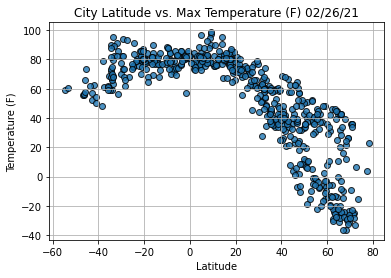

In [7]:
plt.scatter(lats, max_temps, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

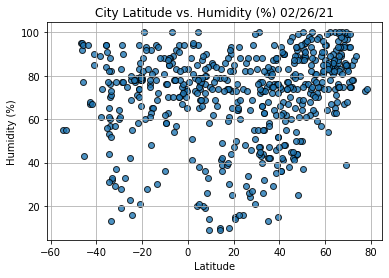

In [8]:
plt.scatter(lats, humidity, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

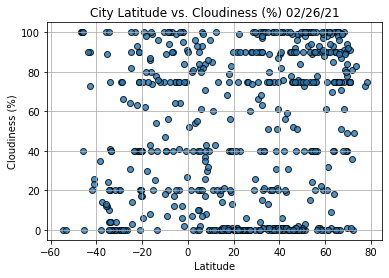

In [9]:
plt.scatter(lats, cloudiness, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()

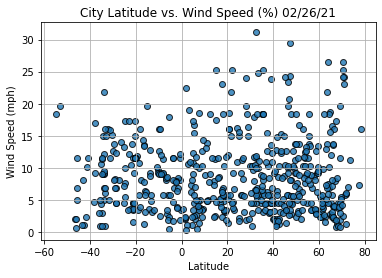

In [10]:
plt.scatter(lats, wind_speed, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show()

In [11]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + (" *  x  + ") + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

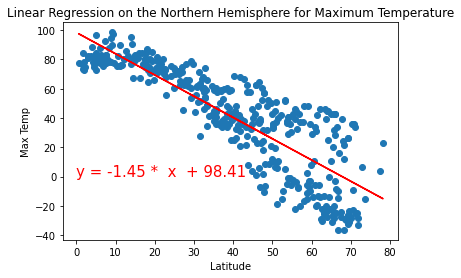

<Figure size 432x288 with 0 Axes>

In [30]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0,0))

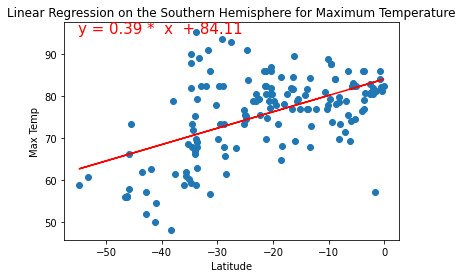

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-55,95))

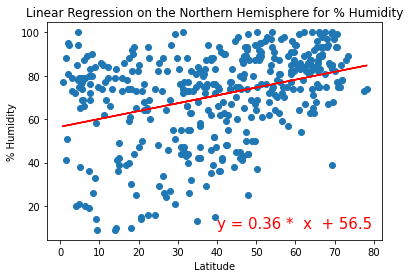

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity", "% Humidity",(40,10))

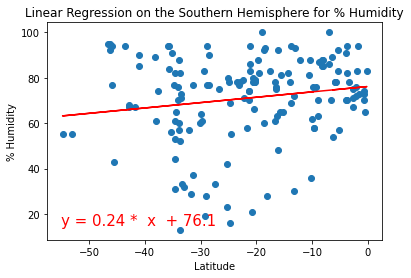

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-55, 15))

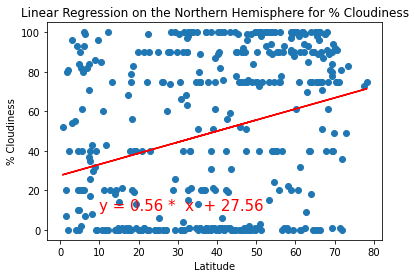

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness",(10,10))

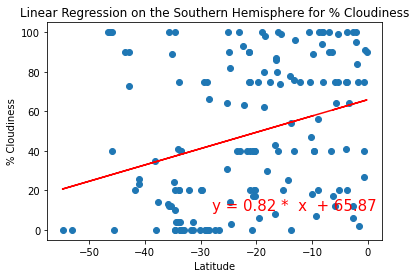

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-28, 10))

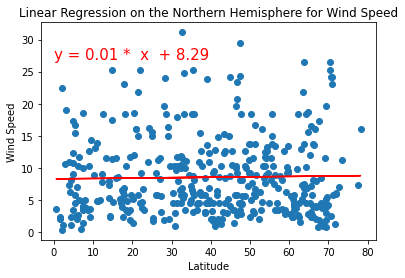

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(0,27))

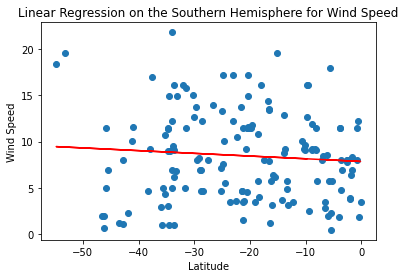

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-28, 23))

In [20]:
city_data_df.dtypes
gmaps.configure(api_key=g_key)

In [28]:
locations = city_data_df[["Lat", "Lng"]]
max_temp = city_data_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 70
What is the maximum temperature you would like for your trip? 80


In [26]:
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"]>=min_temp) & (city_data_df["Max Temp"]<=max_temp)]
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]]
hotel_df["Hotel Name"] = ""

params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

for index, row in hotel_df.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    hotels = requests.get(base_url, params=params).json()
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except:
        continue

C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ben\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]

fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)

info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)

fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))